##Imports

In [7]:
import json
import pandas as pd
import numpy as np
from google.colab import drive


##Connect to Google Drive

In [8]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Load Data

In [9]:
with open('/content/drive/MyDrive/take_home/testline/QuizEndpointLLQT.json','r') as QuizEndpoint_file:
  quiz_end_point_data = json.load(QuizEndpoint_file)

with open('/content/drive/MyDrive/take_home/testline/SubmissionData.json','r') as Quiz_sub_Data_file:
  quiz_sub_data = json.load(Quiz_sub_Data_file)

with open('/content/drive/MyDrive/take_home/testline/HistoricalQuizData.json','r') as His_quiz_data_file:
  historical_quiz_data = json.load(His_quiz_data_file)



In [261]:
historical_quiz_data

[{'id': 336497,
  'quiz_id': 51,
  'user_id': 'YcDFSO4ZukTJnnFMgRNVwZTE4j42',
  'submitted_at': '2025-01-17T15:30:18.027+05:30',
  'created_at': '2025-01-17T15:30:18.044+05:30',
  'updated_at': '2025-01-17T15:30:18.044+05:30',
  'score': 108,
  'trophy_level': 2,
  'accuracy': '90 %',
  'speed': '100',
  'final_score': '105.0',
  'negative_score': '3.0',
  'correct_answers': 27,
  'incorrect_answers': 3,
  'source': 'exam',
  'type': 'topic',
  'started_at': '2025-01-17T15:18:30.000+05:30',
  'ended_at': '2025-01-17T15:30:15.000+05:30',
  'duration': '15:00',
  'better_than': 107,
  'total_questions': 100,
  'rank_text': 'Topic Rank - #-171',
  'mistakes_corrected': 9,
  'initial_mistake_count': 12,
  'response_map': {'2523': 10109,
   '2529': 10130,
   '2533': 10149,
   '2534': 10151,
   '2535': 10155,
   '2537': 10163,
   '2538': 10169,
   '2541': 10178,
   '2543': 10187,
   '2550': 10216,
   '2553': 10227,
   '2554': 10232,
   '2555': 10235,
   '2557': 10242,
   '2558': 10246,
   '2

# Quiz Endpoint File

In [ ]:
quiz_end_point_data["quiz"].keys()

dict_keys(['id', 'name', 'title', 'description', 'difficulty_level', 'topic', 'time', 'is_published', 'created_at', 'updated_at', 'duration', 'end_time', 'negative_marks', 'correct_answer_marks', 'shuffle', 'show_answers', 'lock_solutions', 'is_form', 'show_mastery_option', 'quiz_type', 'is_custom', 'banner_id', 'exam_id', 'show_unanswered', 'ends_at', 'lives', 'live_count', 'coin_count', 'questions_count', 'daily_date', 'max_mistake_count', 'questions'])

In [ ]:
# Questions DataFrame
quiz_data = pd.DataFrame(quiz_end_point_data["quiz"]["questions"])

In [ ]:
# Columns
quiz_data.columns

Index(['id', 'description', 'difficulty_level', 'topic', 'is_published',
       'created_at', 'updated_at', 'detailed_solution', 'type', 'is_mandatory',
       'show_in_feed', 'pyq_label', 'topic_id', 'reading_material_id',
       'fixed_at', 'fix_summary', 'created_by', 'updated_by', 'quiz_level',
       'question_from', 'language', 'photo_url', 'photo_solution_url',
       'is_saved', 'tag', 'options'],
      dtype='object')

In [ ]:
# Size Of questions Data
quiz_data.shape

(128, 26)

In [ ]:
# column wise null count
quiz_data.isnull().sum()

,0
id,0
description,0
difficulty_level,128
topic,0
is_published,0
created_at,0
updated_at,0
detailed_solution,9
type,65
is_mandatory,0


In [ ]:
quiz_data.head(3)

,id,description,difficulty_level,topic,is_published,created_at,updated_at,detailed_solution,type,is_mandatory,...,created_by,updated_by,quiz_level,question_from,language,photo_url,photo_solution_url,is_saved,tag,options
0,1827,The tissue which has free surface that faces e...,None,structural organisation in animals,True,2024-07-02T12:43:34.360+05:30,2024-11-30T18:39:20.587+05:30,**Explanation:**\n\nThe tissue that has a free...,,False,...,None,None,None,Q-bank,None,None,None,False,,"[{'id': 7321, 'description': 'Muscular tissue'..."
1,1828,Epithelial tissue is distinguished from connec...,None,structural organisation in animals,True,2024-07-02T12:50:56.100+05:30,2024-11-30T18:39:20.788+05:30,**Epithelial Tissue**\n\n* Epithelial tissue i...,,False,...,None,None,None,Q-bank,None,None,None,False,,"[{'id': 7325, 'description': 'large extracellu..."
2,1829,The ciliated columnar epithelial cells in huma...,None,structural organisation in animals,True,2024-07-02T12:54:25.824+05:30,2024-11-30T18:39:20.990+05:30,**Explanation:**\n\nCiliated columnar epitheli...,,False,...,None,None,None,Q-bank,None,None,None,False,,"[{'id': 7329, 'description': 'Eustachian tube ..."


###Note:

1.   From above we observe that some columns have null values so that's why we don't need to consider these in dataframe like difficulty_level,quiz_level, lanuguage, photo_solution_url, and also photo_url




##Analysis on Quiz Data

In [ ]:
quiz_data.dtypes

,0
id,int64
description,object
difficulty_level,object
topic,object
is_published,bool
created_at,object
updated_at,object
detailed_solution,object
type,object
is_mandatory,bool


###Drop columns

In [ ]:
#for i in quiz_data.columns:
#  if quiz_data[i].isnull().sum() <=120:
#    quiz_data.drop(i, axis =1, inplace= True)

columns_to_consider = [i for i, j in dict(quiz_data.isnull().sum()).items() if j<120]

In [ ]:
quiz_data = quiz_data[columns_to_consider]

In [ ]:
quiz_data.head(3)

,id,description,topic,is_published,created_at,updated_at,detailed_solution,type,is_mandatory,show_in_feed,topic_id,reading_material_id,question_from,is_saved,tag,options
0,1827,The tissue which has free surface that faces e...,structural organisation in animals,True,2024-07-02T12:43:34.360+05:30,2024-11-30T18:39:20.587+05:30,**Explanation:**\n\nThe tissue that has a free...,,False,False,146,2016,Q-bank,False,,"[{'id': 7321, 'description': 'Muscular tissue'..."
1,1828,Epithelial tissue is distinguished from connec...,structural organisation in animals,True,2024-07-02T12:50:56.100+05:30,2024-11-30T18:39:20.788+05:30,**Epithelial Tissue**\n\n* Epithelial tissue i...,,False,False,146,2017,Q-bank,False,,"[{'id': 7325, 'description': 'large extracellu..."
2,1829,The ciliated columnar epithelial cells in huma...,structural organisation in animals,True,2024-07-02T12:54:25.824+05:30,2024-11-30T18:39:20.990+05:30,**Explanation:**\n\nCiliated columnar epitheli...,,False,False,146,2018,Q-bank,False,,"[{'id': 7329, 'description': 'Eustachian tube ..."


In [193]:
quiz_data[quiz_data['id']==1837]['options'].values

array([list([{'id': 7361, 'description': 'Tight junctions help to stop substances from leaking across a tissue.', 'question_id': 1837, 'is_correct': False, 'created_at': '2024-07-02T13:21:54.614+05:30', 'updated_at': '2024-07-02T13:21:54.614+05:30', 'unanswered': False, 'photo_url': None}, {'id': 7362, 'description': 'Adhering junctions perform cementing to keen neighbouring cells together.', 'question_id': 1837, 'is_correct': False, 'created_at': '2024-07-02T13:21:54.616+05:30', 'updated_at': '2024-07-02T13:21:54.616+05:30', 'unanswered': False, 'photo_url': None}, {'id': 7363, 'description': 'All of the above', 'question_id': 1837, 'is_correct': True, 'created_at': '2024-07-02T13:21:54.618+05:30', 'updated_at': '2024-07-03T16:51:16.545+05:30', 'unanswered': False, 'photo_url': None}, {'id': 7364, 'description': 'Gap junctions facilitate the cells to communicate With each other by connecting the cytoplasm adjoining cells, for rapid transfer of ions small molecules and sometimes big mo

In [ ]:
quiz_data.columns

Index(['id', 'description', 'topic', 'is_published', 'created_at',
       'updated_at', 'detailed_solution', 'type', 'is_mandatory',
       'show_in_feed', 'topic_id', 'reading_material_id', 'question_from',
       'is_saved', 'tag', 'options'],
      dtype='object')

In [ ]:
quiz_data.drop(columns=['tag'], axis=1, inplace=True)

In [ ]:
quiz_data.head(3)###useful columns for dataframe

,id,description,topic,is_published,created_at,updated_at,detailed_solution,type,is_mandatory,show_in_feed,topic_id,reading_material_id,question_from,is_saved,options
0,1827,The tissue which has free surface that faces e...,structural organisation in animals,True,2024-07-02T12:43:34.360+05:30,2024-11-30T18:39:20.587+05:30,**Explanation:**\n\nThe tissue that has a free...,,False,False,146,2016,Q-bank,False,"[{'id': 7321, 'description': 'Muscular tissue'..."
1,1828,Epithelial tissue is distinguished from connec...,structural organisation in animals,True,2024-07-02T12:50:56.100+05:30,2024-11-30T18:39:20.788+05:30,**Epithelial Tissue**\n\n* Epithelial tissue i...,,False,False,146,2017,Q-bank,False,"[{'id': 7325, 'description': 'large extracellu..."
2,1829,The ciliated columnar epithelial cells in huma...,structural organisation in animals,True,2024-07-02T12:54:25.824+05:30,2024-11-30T18:39:20.990+05:30,**Explanation:**\n\nCiliated columnar epitheli...,,False,False,146,2018,Q-bank,False,"[{'id': 7329, 'description': 'Eustachian tube ..."


# Quiz Submission Data

In [256]:
quiz_sub_data

{'id': 336566,
 'quiz_id': 43,
 'user_id': '7ZXdz3zHuNcdg9agb5YpaOGLQqw2',
 'submitted_at': '2025-01-17T15:51:29.859+05:30',
 'created_at': '2025-01-17T15:51:29.871+05:30',
 'updated_at': '2025-01-17T15:51:29.871+05:30',
 'score': 32,
 'trophy_level': 2,
 'accuracy': '80 %',
 'speed': '100',
 'final_score': '30.0',
 'negative_score': '2.0',
 'correct_answers': 8,
 'incorrect_answers': 2,
 'source': 'live',
 'type': 'topic',
 'started_at': '2025-01-17T16:20:44.000+05:30',
 'ended_at': '2025-01-17T16:21:28.000+05:30',
 'duration': '15:00',
 'better_than': 24,
 'total_questions': 128,
 'rank_text': 'Topic Rank - #2402',
 'mistakes_corrected': 6,
 'initial_mistake_count': 8,
 'response_map': {'1837': 7363,
  '1848': 7407,
  '1852': 7423,
  '1862': 7464,
  '1877': 7525,
  '1878': 7529,
  '1900': 7617,
  '1917': 7685,
  '1934': 7750,
  '1964': 7872},
 'quiz': {'id': 43,
  'name': None,
  'title': 'Structural Organisation in Animals and Plants (7)',
  'description': '',
  'difficulty_level': 

##Historical Quiz Data

In [224]:
historical_quiz_df = pd.DataFrame(historical_quiz_data)

In [266]:
historical_quiz_data

[{'id': 336497,
  'quiz_id': 51,
  'user_id': 'YcDFSO4ZukTJnnFMgRNVwZTE4j42',
  'submitted_at': '2025-01-17T15:30:18.027+05:30',
  'created_at': '2025-01-17T15:30:18.044+05:30',
  'updated_at': '2025-01-17T15:30:18.044+05:30',
  'score': 108,
  'trophy_level': 2,
  'accuracy': '90 %',
  'speed': '100',
  'final_score': '105.0',
  'negative_score': '3.0',
  'correct_answers': 27,
  'incorrect_answers': 3,
  'source': 'exam',
  'type': 'topic',
  'started_at': '2025-01-17T15:18:30.000+05:30',
  'ended_at': '2025-01-17T15:30:15.000+05:30',
  'duration': '15:00',
  'better_than': 107,
  'total_questions': 100,
  'rank_text': 'Topic Rank - #-171',
  'mistakes_corrected': 9,
  'initial_mistake_count': 12,
  'response_map': {'2523': 10109,
   '2529': 10130,
   '2533': 10149,
   '2534': 10151,
   '2535': 10155,
   '2537': 10163,
   '2538': 10169,
   '2541': 10178,
   '2543': 10187,
   '2550': 10216,
   '2553': 10227,
   '2554': 10232,
   '2555': 10235,
   '2557': 10242,
   '2558': 10246,
   '2

In [225]:
historical_quiz_df.shape

(14, 26)

In [226]:
historical_quiz_df.head(3)

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,started_at,ended_at,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,response_map,quiz
0,336497,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17T15:30:18.027+05:30,2025-01-17T15:30:18.044+05:30,2025-01-17T15:30:18.044+05:30,108,2,90 %,100,...,2025-01-17T15:18:30.000+05:30,2025-01-17T15:30:15.000+05:30,15:00,107,100,Topic Rank - #-171,9,12,"{'2523': 10109, '2529': 10130, '2533': 10149, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."
1,336448,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17T15:17:44.042+05:30,2025-01-17T15:17:44.056+05:30,2025-01-17T15:17:44.056+05:30,92,1,100 %,100,...,2025-01-17T15:07:45.000+05:30,2025-01-17T15:17:41.000+05:30,15:00,395,23,Topic Rank - #-9140,3,3,"{'48': 192, '49': 197, '50': 199, '51': 203, '...","{'id': 6, 'name': None, 'title': 'Human Physio..."
2,333330,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16T20:13:19.682+05:30,2025-01-16T20:13:19.699+05:30,2025-01-16T20:13:19.699+05:30,116,2,96 %,100,...,2025-01-16T20:01:10.000+05:30,2025-01-16T20:13:18.000+05:30,15:00,115,100,Topic Rank - #-418,11,12,"{'2523': 10109, '2525': 10117, '2528': 10127, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."


In [229]:
historical_quiz_df.columns

Index(['id', 'quiz_id', 'user_id', 'submitted_at', 'created_at', 'updated_at',
       'score', 'trophy_level', 'accuracy', 'speed', 'final_score',
       'negative_score', 'correct_answers', 'incorrect_answers', 'source',
       'type', 'started_at', 'ended_at', 'duration', 'better_than',
       'total_questions', 'rank_text', 'mistakes_corrected',
       'initial_mistake_count', 'response_map', 'quiz'],
      dtype='object')

###Historical Quiz Details

In [242]:
historical_quiz_details_df = pd.DataFrame(list(historical_quiz_df['quiz'].values))

In [258]:
historical_quiz_details_df

,id,name,title,description,difficulty_level,topic,time,is_published,created_at,updated_at,...,exam_id,show_unanswered,ends_at,lives,live_count,coin_count,questions_count,daily_date,max_mistake_count,reading_materials
0,51,None,Human Physiology (15),,None,Body Fluids and Circulation,2024-07-12T00:00:00.000+05:30,True,2024-07-12T11:17:37.658+05:30,2024-09-23T18:43:27.373+05:30,...,None,False,2025-01-18,None,Free Test,-1,100,"January 17, 2025",15,[]
1,6,None,Human Physiology PYQ,,None,Body Fluids and Circulation,2024-04-25T00:00:00.000+05:30,True,2024-04-26T15:26:29.886+05:30,2024-06-05T18:27:32.163+05:30,...,None,False,2025-01-18,None,Free Test,-1,23,"January 17, 2025",15,[]
2,51,None,Human Physiology (15),,None,Body Fluids and Circulation,2024-07-12T00:00:00.000+05:30,True,2024-07-12T11:17:37.658+05:30,2024-09-23T18:43:27.373+05:30,...,None,False,2025-01-18,None,Free Test,-1,100,"January 17, 2025",15,[]
3,6,None,Human Physiology PYQ,,None,Body Fluids and Circulation,2024-04-25T00:00:00.000+05:30,True,2024-04-26T15:26:29.886+05:30,2024-06-05T18:27:32.163+05:30,...,None,False,2025-01-18,None,Free Test,-1,23,"January 17, 2025",15,[]
4,51,None,Human Physiology (15),,None,Body Fluids and Circulation,2024-07-12T00:00:00.000+05:30,True,2024-07-12T11:17:37.658+05:30,2024-09-23T18:43:27.373+05:30,...,None,False,2025-01-18,None,Free Test,-1,100,"January 17, 2025",15,[]
5,57,None,Reproduction,,None,Human Reproduction,2024-07-12T00:00:00.000+05:30,True,2024-07-12T16:57:41.878+05:30,2024-09-23T18:43:28.935+05:30,...,None,False,2025-01-18,None,Free Test,-1,89,"January 17, 2025",15,[]
6,6,None,Human Physiology PYQ,,None,Body Fluids and Circulation,2024-04-25T00:00:00.000+05:30,True,2024-04-26T15:26:29.886+05:30,2024-06-05T18:27:32.163+05:30,...,None,False,2025-01-18,None,Free Test,-1,23,"January 17, 2025",15,[]
7,20,None,PRINCIPLES OF INHERITANCE AND VARIATION PYQ,,None,principles of inheritance and variation,2024-06-07T00:00:00.000+05:30,True,2024-06-07T15:40:47.746+05:30,2024-06-20T18:17:03.628+05:30,...,None,False,2025-01-18,None,Free Test,-1,59,"January 17, 2025",15,[]
8,24,None,MICROBES IN HUMAN WELFARE PYQ,,None,microbes in human welfare,2024-06-10T00:00:00.000+05:30,True,2024-06-10T13:19:22.991+05:30,2024-06-24T14:01:22.154+05:30,...,None,False,2025-01-18,None,Free Test,-1,20,"January 17, 2025",15,[]
9,18,None,REPRODUCTIVE HEALTH PYQ,,None,reproductive health,2024-06-07T00:00:00.000+05:30,True,2024-06-07T15:24:37.590+05:30,2024-06-14T15:16:51.212+05:30,...,None,False,2025-01-18,None,Free Test,-1,22,"January 17, 2025",15,[]


In [6]:
import json
from datetime import datetime
from typing import Dict, List
import numpy as np

class StudentAnalyzer:
    def __init__(self, current_quiz_file: str, historical_quiz_file: str):
        # Load current quiz data
        with open(current_quiz_file, 'r') as file:
            self.current_quiz = json.load(file)

        # Load historical quiz data
        with open(historical_quiz_file, 'r') as file:
            historical_data = json.load(file)

        # Filter historical data for the current user
        self.user_id = self.current_quiz['user_id']
        self.historical_quizzes = [quiz for quiz in historical_data if quiz['user_id'] == self.user_id]

    def analyze_current_performance(self) -> Dict:
        """Analyze the current quiz performance with enhanced metrics"""
        quiz_duration = self._calculate_duration(
            self.current_quiz['started_at'],
            self.current_quiz['ended_at']
        )

        current_stats = {
            'accuracy': float(self.current_quiz['accuracy'].strip(' %')),
            'speed': float(self.current_quiz['speed']),
            'raw_score': self.current_quiz['score'],
            'final_score': float(self.current_quiz['final_score']),
            'negative_score': float(self.current_quiz['negative_score']),
            'correct_answers': self.current_quiz['correct_answers'],
            'incorrect_answers': self.current_quiz['incorrect_answers'],
            'total_questions': self.current_quiz['total_questions'],
            'topic': self.current_quiz['quiz']['topic'],
            'mistakes_corrected': self.current_quiz['mistakes_corrected'],
            'initial_mistake_count': self.current_quiz['initial_mistake_count'],
            'trophy_level': self.current_quiz['trophy_level'],
            'better_than_percentile': self.current_quiz['better_than'],
            'duration_minutes': quiz_duration,
            'questions_attempted': len(self.current_quiz['response_map']),
            'rank': self._extract_rank(self.current_quiz['rank_text']),
            'marks_per_question': {
                'correct': float(self.current_quiz['quiz']['correct_answer_marks']),
                'negative': float(self.current_quiz['quiz']['negative_marks'])
            }
        }

        return current_stats

    def _calculate_duration(self, start_time: str, end_time: str) -> float:
        """Calculate actual duration of quiz attempt in minutes"""
        start = datetime.strptime(start_time, '%Y-%m-%dT%H:%M:%S.%f%z')
        end = datetime.strptime(end_time, '%Y-%m-%dT%H:%M:%S.%f%z')
        return (end - start).total_seconds() / 60

    def _extract_rank(self, rank_text: str) -> int:
        """Extract numerical rank from rank text"""
        try:
            return int(rank_text.split('#')[-1])
        except:
            return None

    def analyze_test_taking_strategy(self) -> Dict:
        """Analyze student's test-taking strategy"""
        current_stats = self.analyze_current_performance()

        # Calculate time per question
        time_per_question = current_stats['duration_minutes'] / current_stats['questions_attempted']

        # Calculate attempt rate
        attempt_rate = (current_stats['questions_attempted'] /
                       current_stats['total_questions'] * 100)

        # Calculate effective score rate
        score_rate = (current_stats['final_score'] /
                     (current_stats['questions_attempted'] *
                      current_stats['marks_per_question']['correct']) * 100)

        strategy_analysis = {
            'time_management': {
                'time_per_question': round(time_per_question, 2),
                'attempt_rate': round(attempt_rate, 2),
                'is_time_efficient': time_per_question < 1.5  # benchmark of 1.5 minutes per question
            },
            'accuracy_metrics': {
                'score_rate': round(score_rate, 2),
                'negative_marking_impact': round(
                    current_stats['negative_score'] / current_stats['raw_score'] * 100
                    if current_stats['raw_score'] > 0 else 0, 2
                )
            },
            'attempt_pattern': {
                'questions_attempted': current_stats['questions_attempted'],
                'completion_rate': round(attempt_rate, 2),
                'correct_to_attempt_ratio': round(
                    current_stats['correct_answers'] /
                    current_stats['questions_attempted'] * 100, 2
                )
            }
        }

        return strategy_analysis

    def generate_recommendations(self) -> Dict:
        """Generate enhanced personalized recommendations"""
        current_stats = self.analyze_current_performance()
        strategy_analysis = self.analyze_test_taking_strategy()
        historical_analysis = self.analyze_historical_performance()

        recommendations = {
            'priority_actions': [],
            'topic_focus': [],
            'test_strategy': [],
            'improvement_areas': []
        }

        # Priority actions based on performance metrics
        if current_stats['negative_score'] > current_stats['raw_score'] * 0.1:
            recommendations['priority_actions'].append(
                "Focus on accuracy over speed - your negative marks are impacting your score significantly"
            )

        # Topic focus based on performance
        if current_stats['accuracy'] < 85:
            recommendations['topic_focus'].append(
                f"Dedicate more time to {current_stats['topic']} - aim for at least 85% accuracy"
            )

        # Test strategy recommendations
        if strategy_analysis['time_management']['time_per_question'] > 1.5:
            recommendations['test_strategy'].append(
                "Practice time management - aim to spend no more than 1.5 minutes per question"
            )

        if strategy_analysis['attempt_pattern']['completion_rate'] < 90:
            recommendations['test_strategy'].append(
                "Work on attempting more questions - you attempted only "
                f"{strategy_analysis['attempt_pattern']['completion_rate']}% of total questions"
            )

        # Improvement areas based on mistake patterns
        if current_stats['initial_mistake_count'] > current_stats['mistakes_corrected']:
            recommendations['improvement_areas'].append(
                "Review your mistake patterns - focus on understanding why you made these mistakes"
            )

        # Historical performance based recommendations
        if historical_analysis['accuracy_trend'] == 'decreasing':
            recommendations['priority_actions'].append(
                "Your accuracy has been decreasing over time. Focus on consistent practice and review."
            )

        if historical_analysis['negative_marking_impact'] > 20:
            recommendations['improvement_areas'].append(
                "Historical data shows a high impact of negative marking. Focus on accuracy."
            )

        # Handle first submission case
        if not self.historical_quizzes:
            recommendations['priority_actions'].append(
                "This is your first submission. Focus on building a strong foundation and consistent practice."
            )

        return recommendations

    def calculate_student_persona(self) -> Dict:
        """Define enhanced student persona based on performance patterns"""
        current_stats = self.analyze_current_performance()
        strategy_analysis = self.analyze_test_taking_strategy()
        historical_analysis = self.analyze_historical_performance()

        persona = {
            'performance_level': self._determine_performance_level(current_stats),
            'test_taking_style': self._analyze_test_style(strategy_analysis),
            'competitive_standing': self._evaluate_competitive_position(current_stats),
            'learning_potential': self._assess_learning_potential(current_stats),
            'suggested_focus': self._determine_focus_area(current_stats, strategy_analysis),
            'historical_trends': historical_analysis
        }

        return persona

    def _determine_performance_level(self, stats: Dict) -> str:
        if stats['accuracy'] >= 90 and stats['better_than_percentile'] > 90:
            return "Top Performer"
        elif stats['accuracy'] >= 75 and stats['better_than_percentile'] > 60:
            return "Strong Performer"
        return "Developing Performer"

    def _analyze_test_style(self, strategy: Dict) -> str:
        if strategy['time_management']['is_time_efficient']:
            if strategy['accuracy_metrics']['score_rate'] > 80:
                return "Strategic Speed Solver"
            return "Quick but Needs Accuracy"
        return "Thorough but Needs Speed"

    def _evaluate_competitive_position(self, stats: Dict) -> str:
        if stats['better_than_percentile'] > 90:
            return "Top 10% Competitor"
        elif stats['better_than_percentile'] > 75:
            return "Top 25% Competitor"
        return "Developing Competitor"

    def _assess_learning_potential(self, stats: Dict) -> str:
        correction_rate = (stats['mistakes_corrected'] /
                         stats['initial_mistake_count']
                         if stats['initial_mistake_count'] > 0 else 1)
        if correction_rate > 0.8:
            return "High Learning Agility"
        elif correction_rate > 0.5:
            return "Moderate Learning Agility"
        return "Needs Learning Support"

    def _determine_focus_area(self, stats: Dict, strategy: Dict) -> str:
        if strategy['accuracy_metrics']['negative_marking_impact'] > 20:
            return "Accuracy Improvement"
        elif strategy['attempt_pattern']['completion_rate'] < 80:
            return "Speed Enhancement"
        return "Concept Mastery"

    def analyze_historical_performance(self) -> Dict:
        """Analyze historical quiz performance to identify trends and patterns"""
        if not self.historical_quizzes:
            return {
                'accuracy_trend': 'no data',
                'negative_marking_impact': 0,
                'average_accuracy': 0,
                'average_speed': 0,
                'average_final_score': 0
            }

        accuracies = []
        speeds = []
        final_scores = []
        negative_impacts = []

        for quiz in self.historical_quizzes:
            accuracy = float(quiz['accuracy'].strip(' %'))
            speed = float(quiz['speed'])
            final_score = float(quiz['final_score'])
            negative_score = float(quiz['negative_score'])
            raw_score = quiz['score']

            accuracies.append(accuracy)
            speeds.append(speed)
            final_scores.append(final_score)
            negative_impacts.append(negative_score / raw_score * 100 if raw_score > 0 else 0)

        # Determine accuracy trend
        if len(accuracies) > 1:
            accuracy_trend = 'increasing' if accuracies[-1] > accuracies[0] else 'decreasing'
        else:
            accuracy_trend = 'no trend'

        return {
            'accuracy_trend': accuracy_trend,
            'negative_marking_impact': round(np.mean(negative_impacts), 2),
            'average_accuracy': round(np.mean(accuracies), 2),
            'average_speed': round(np.mean(speeds), 2),
            'average_final_score': round(np.mean(final_scores), 2)
        }

# Example usage
if __name__ == "__main__":
    # Initialize with provided quiz data files
    analyzer = StudentAnalyzer('drive/MyDrive/take_home/testline/SubmissionData.json', 'drive/MyDrive/take_home/testline/HistoricalQuizData.json')

    # Get detailed analysis
    performance = analyzer.analyze_current_performance()
    strategy = analyzer.analyze_test_taking_strategy()
    recommendations = analyzer.generate_recommendations()
    persona = analyzer.calculate_student_persona()

    print("Performance Analysis:", performance)
    print("\nTest Strategy Analysis:", strategy)
    print("\nPersonalized Recommendations:", recommendations)
    print("\nStudent Persona:", persona)

Performance Analysis: {'accuracy': 80.0, 'speed': 100.0, 'raw_score': 32, 'final_score': 30.0, 'negative_score': 2.0, 'correct_answers': 8, 'incorrect_answers': 2, 'total_questions': 128, 'topic': 'Structural Organisation in Animals', 'mistakes_corrected': 6, 'initial_mistake_count': 8, 'trophy_level': 2, 'better_than_percentile': 24, 'duration_minutes': 0.7333333333333333, 'questions_attempted': 10, 'rank': 2402, 'marks_per_question': {'correct': 4.0, 'negative': 1.0}}

Test Strategy Analysis: {'time_management': {'time_per_question': 0.07, 'attempt_rate': 7.81, 'is_time_efficient': True}, 'accuracy_metrics': {'score_rate': 75.0, 'negative_marking_impact': 6.25}, 'attempt_pattern': {'questions_attempted': 10, 'completion_rate': 7.81, 'correct_to_attempt_ratio': 80.0}}

Personalized Recommendations: {'priority_actions': ['This is your first submission. Focus on building a strong foundation and consistent practice.'], 'topic_focus': ['Dedicate more time to Structural Organisation in Ani

# EDA

=== Basic Information ===
Current Quiz Topic: Structural Organisation in Animals
Current Quiz Accuracy: 80 %
Current Quiz Final Score: 30.0
Number of Historical Attempts: 14


=== Summary Statistics ===
         accuracy       speed  final_score  negative_score  duration_minutes
count   14.000000   14.000000    14.000000       14.000000         14.000000
mean    72.214286   95.071429    54.428571        5.857143         10.034524
std     27.904173    7.216054    38.142878        6.948792          4.531143
min     30.000000   78.000000     5.000000        0.000000          1.433333
25%     44.750000   91.250000    24.750000        1.000000          5.987500
50%     87.000000  100.000000    37.500000        3.000000         10.925000
75%     95.250000  100.000000    88.000000        8.500000         13.175000
max    100.000000  100.000000   115.000000       20.000000         16.383333


=== Accuracy Trend Over Time ===


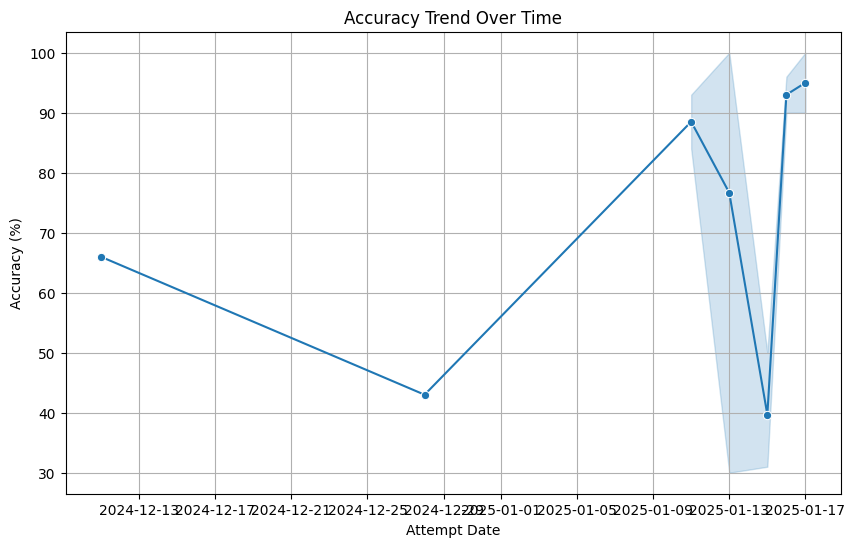

=== Distribution of Final Scores ===


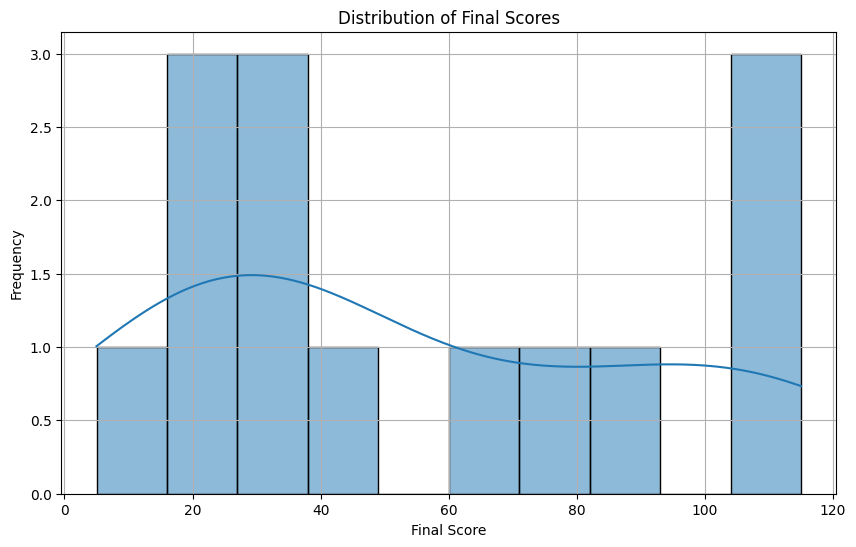

=== Correlation Heatmap ===


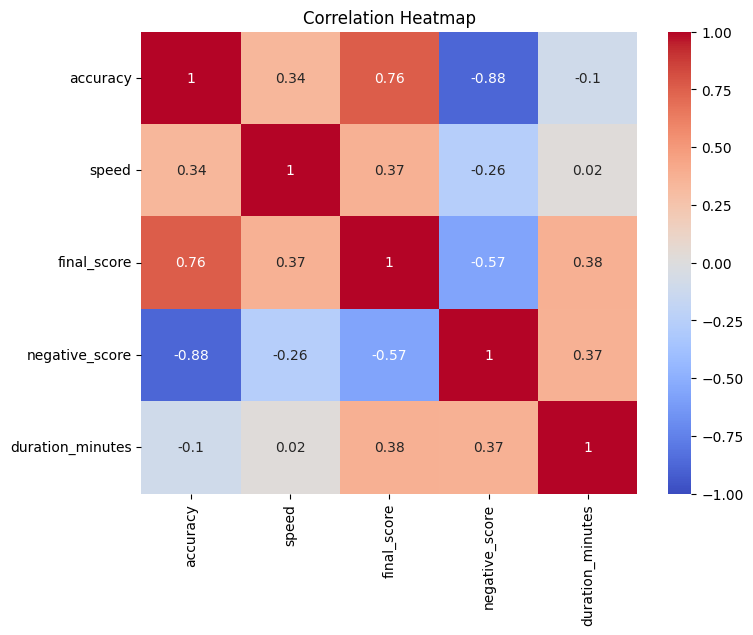

=== Topic-wise Performance ===
                                      topic    accuracy  final_score  \
0               Body Fluids and Circulation   72.333333    78.666667   
1              Body Fluids and Circulation    80.000000    51.333333   
2                        Human Reproduction   38.000000    24.000000   
3                       Reproductive Health   43.000000    35.000000   
4              Respiration and Gas Exchange   66.000000    21.000000   
5                 human health and disease    93.000000   110.000000   
6                 microbes in human welfare  100.000000    76.000000   
7  principles of inheritance and variation    30.000000     5.000000   
8                      reproductive health    92.000000    50.500000   

   duration_minutes  
0         12.366667  
1         10.061111  
2         10.100000  
3         16.383333  
4          5.466667  
5         15.750000  
6         13.900000  
7          4.583333  
8          3.508333  


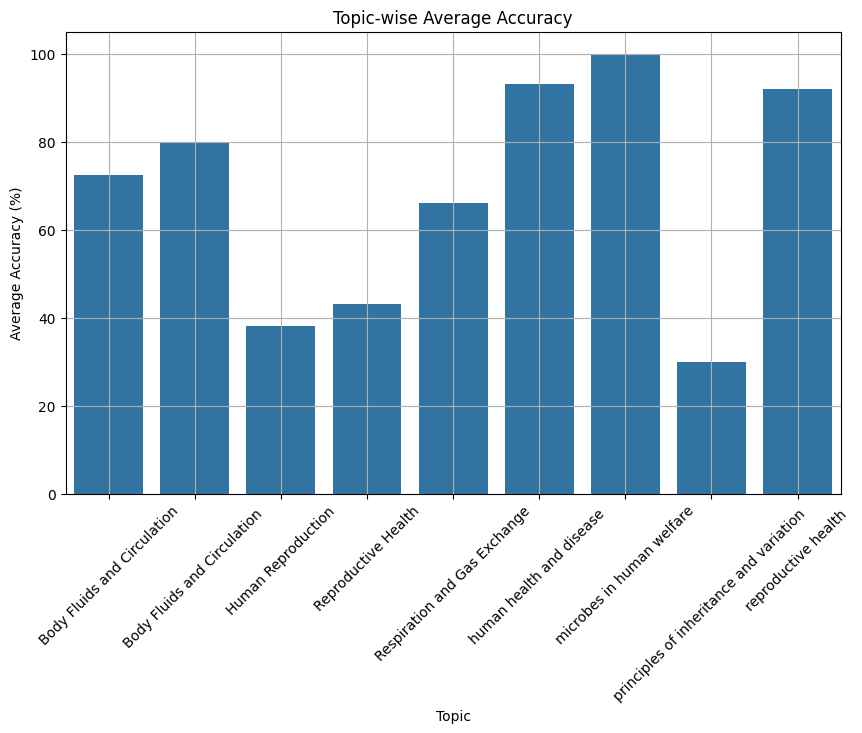

=== Negative Marking Impact ===


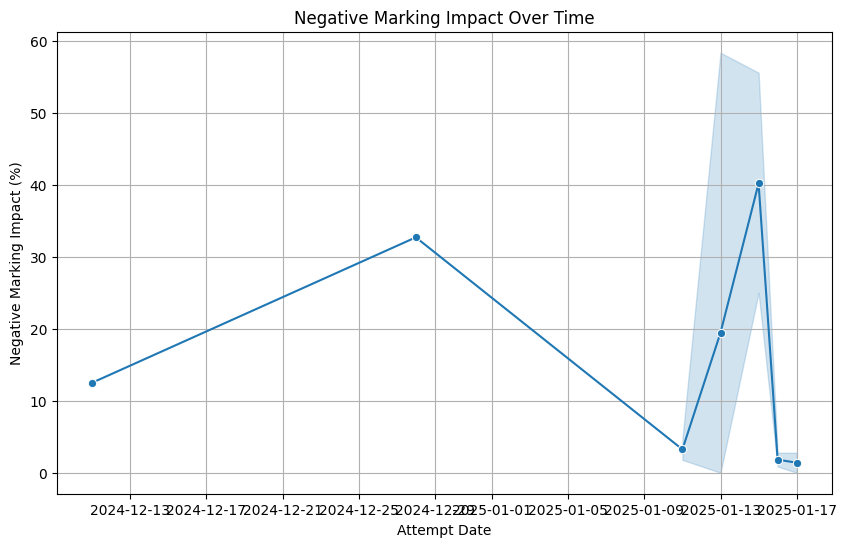

In [12]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load data
def load_data(current_quiz_file: str, historical_quiz_file: str) -> tuple:
    """Load current and historical quiz data from JSON files."""
    with open(current_quiz_file, 'r') as file:
        current_quiz = json.load(file)

    with open(historical_quiz_file, 'r') as file:
        historical_data = json.load(file)

    return current_quiz, historical_data

# Convert historical data to DataFrame
def prepare_historical_data(historical_data: List[Dict], user_id: str) -> pd.DataFrame:
    """Filter and prepare historical data for the given user."""
    # Filter data for the current user
    #user_data = [quiz for quiz in historical_data if quiz['user_id'] == user_id]

    # Convert to DataFrame
    #df = pd.DataFrame(user_data)
    df = pd.DataFrame(historical_data)

    # Convert relevant columns to numeric
    df['accuracy'] = df['accuracy'].str.strip(' %').astype(float)
    df['speed'] = df['speed'].astype(float)
    df['final_score'] = df['final_score'].astype(float)
    df['negative_score'] = df['negative_score'].astype(float)
    df['score'] = df['score'].astype(float)
    df['correct_answers'] = df['correct_answers'].astype(int)
    df['incorrect_answers'] = df['incorrect_answers'].astype(int)
    df['total_questions'] = df['total_questions'].astype(int)
    df['questions_attempted'] = df['response_map'].apply(len)

    # Calculate duration in minutes
    df['started_at'] = pd.to_datetime(df['started_at'])
    df['ended_at'] = pd.to_datetime(df['ended_at'])
    df['duration_minutes'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

    # Extract topic from quiz
    df['topic'] = df['quiz'].apply(lambda x: x['topic'])

    return df

# Perform EDA
def perform_eda(current_quiz: Dict, historical_df: pd.DataFrame):
    """Perform exploratory data analysis on the quiz data."""
    # Print basic info
    print("=== Basic Information ===")
    print(f"Current Quiz Topic: {current_quiz['quiz']['topic']}")
    print(f"Current Quiz Accuracy: {current_quiz['accuracy']}")
    print(f"Current Quiz Final Score: {current_quiz['final_score']}")
    print(f"Number of Historical Attempts: {len(historical_df)}")
    print("\n")

    # Summary statistics
    print("=== Summary Statistics ===")
    print(historical_df[['accuracy', 'speed', 'final_score', 'negative_score', 'duration_minutes']].describe())
    print("\n")

    # Accuracy trend over time
    print("=== Accuracy Trend Over Time ===")
    historical_df['attempt_date'] = historical_df['started_at'].dt.date
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='attempt_date', y='accuracy', data=historical_df, marker='o')
    plt.title('Accuracy Trend Over Time')
    plt.xlabel('Attempt Date')
    plt.ylabel('Accuracy (%)')
    plt.grid(True)
    plt.show()

    # Distribution of final scores
    print("=== Distribution of Final Scores ===")
    plt.figure(figsize=(10, 6))
    sns.histplot(historical_df['final_score'], bins=10, kde=True)
    plt.title('Distribution of Final Scores')
    plt.xlabel('Final Score')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # Correlation heatmap
    print("=== Correlation Heatmap ===")
    correlation_matrix = historical_df[['accuracy', 'speed', 'final_score', 'negative_score', 'duration_minutes']].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap')
    plt.show()

    # Topic-wise performance
    print("=== Topic-wise Performance ===")
    topic_performance = historical_df.groupby('topic').agg({
        'accuracy': 'mean',
        'final_score': 'mean',
        'duration_minutes': 'mean'
    }).reset_index()
    print(topic_performance)

    # Plot topic-wise accuracy
    plt.figure(figsize=(10, 6))
    sns.barplot(x='topic', y='accuracy', data=topic_performance)
    plt.title('Topic-wise Average Accuracy')
    plt.xlabel('Topic')
    plt.ylabel('Average Accuracy (%)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    # Negative marking impact
    print("=== Negative Marking Impact ===")
    historical_df['negative_marking_impact'] = (historical_df['negative_score'] / historical_df['score']) * 100
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='attempt_date', y='negative_marking_impact', data=historical_df, marker='o')
    plt.title('Negative Marking Impact Over Time')
    plt.xlabel('Attempt Date')
    plt.ylabel('Negative Marking Impact (%)')
    plt.grid(True)
    plt.show()

# Main function
def main():
    # Parse arguments
    #import argparse
    #parser = argparse.ArgumentParser(description="Perform EDA on student quiz data.")
    #parser.add_argument('--current', type=str, required=True, help="Path to the current quiz JSON file.")
    #parser.add_argument('--historical', type=str, required=True, help="Path to the historical quizzes JSON file.")
    #args = parser.parse_args()

    # Load data
    current_quiz, historical_data = load_data('drive/MyDrive/take_home/testline/SubmissionData.json', 'drive/MyDrive/take_home/testline/HistoricalQuizData.json')

    # Prepare historical data
    historical_df = prepare_historical_data(historical_data, current_quiz['user_id'])

    # Perform EDA
    perform_eda(current_quiz, historical_df)

# Run the script
if __name__ == "__main__":
    main()